In [1]:
import numpy as np

def equity_and_savings(sale_price, down_payment, initial_rent, equity_appreciation_rate,
                       mortgage_years=30.0, mortgage_interest_rate=0.04, property_tax_rate=0.0125,
                       annual_maintenance=1000.0, annual_hoa=2000.0, annual_home_insurance=1500.0,
                       marginal_income_tax_rate=0.30, inflation_rate=0.02, savings_interest_rate=0.04,
                       closing_costs=0.05, number_of_months=300, debug=True):
    """
    Purpose:
    Compare equity build-up in two scenarios
    (1) Buy house with monthly mortgage payment and pay monthly fees
        (e.g., HOA, insurance, maintenance)
    (2) Pay rent every month and invest the difference in a savings (or retirement) account

    This function will calculate the equity build-up of both scenarios for <no_months> months
    and return both as numpy arrays

    Inputs:
    - purchase_price (US$): Purchase price of the house (buy scenario)
    - down_payment (US$): Down payment of the house (buy scenario)
    - initial_rent (US$): Initial monthly rent (rent scenario)
    - equity_appreciation_rate (1): Annual appreciation of real estate (buy and rent scenarios)
    - mortgage_years (years): Mortgage length (e.g., 30 years) (buy scenario)
    - mortgage_interest_rate (1): Interest rate for mortgage (buy scenario)
    - property_tax_rate (1): Annual rate of property tax (buy scenario)
    - annual_maintenance (US$): Annual maintenance fees (buy scenario)
    - annual_hoa (US$): Annual payments to home owners association (buy scenario)
    - annual_home_insurance (US$): Annual insurance payments (buy scenario)
    - marginal_income_tax_rate (1): Depends on the tax bracket (buy scenario)
    - inflation_rate (1): Inflation rate used to estimate increases in annual fees (buy scenario)
    - savings_interest_rate (1): Estimated interest rate for the difference between buy and rent (rent scenario)
    - closing_costs (1): Ratio of home price that is paid when closing deal (buy scenario)
    - number_of_months (months): Number of months to plot (buy and rent scenario)
    - debug (Boolean): Whether to print debug information
    """

    monthly_mortgage_payment = ((purchase_price-down_payment)*(1.0-1.0/(1.0+mortgage_interest_rate/12))
        /(1.0-1.0/(1.0+mortgage_interest_rate/12)**(mortgage_years*12+1)))
    if debug:
        print('The monthly mortgage is {:.2f}'.format(monthly_mortgage_payment))
    
    # Initialize arrays
    home_value = np.zeros(number_of_months) # Current value of the house
    debt = np.zeros(number_of_months) # Current debt in mortgage account
    equity = np.zeros(number_of_months) # Current equity owned
    cash_outflow = np.zeros(number_of_months) # Total outflow of cash at the current month (buy scenario)
    rent = np.zeros(number_of_months) # Current value of rent
    savings = np.zeros(number_of_months) # Savings built up over time when renting

    # Assume that in both scenarios, we start with the money paid as down payment + closing costs
    home_value[0] = purchase_price    
    debt[0] = purchase_price-down_payment    
    equity[0] = down_payment+closing_costs*purchase_price
    cash_outflow[0] = down_payment+closing_costs*purchase_price
    rent[0] = initial_rent    
    savings[0] = down_payment+closing_costs*purchase_price

    for mo in range(1,number_of_months):
        ## Buy scenario
        home_value[mo] = home_value[mo-1]*(1.0+equity_appreciation_rate/12)
        # Contribution to principal
        interest_on_debt = debt[mo-1]*mortgage_interest_rate/12
        paid_principal = monthly_mortgage_payment-interest_on_debt
        if debug:
            print('In month {}, {:.2f} were paid towards interest and {:.2f} towards the principal'.format(
                mo, interest_on_debt, paid_principal))
        
        # Total cash outflow
        insurance_payment = annual_home_insurance/12*(1.0+inflation_rate/12)**mo
        hoa_payment = annual_hoa/12*(1.0+inflation_rate/12)**mo
        maintenance_payment = annual_maintenance/12*(1.0+inflation_rate/12)**mo
        property_tax_payment = home_value[mo-1]*property_tax_rate/12
        savings_interest_deduction = (interest_on_debt+property_tax_payment)*marginal_income_tax_rate
        cash_outflow[mo] = (monthly_mortgage_payment+insurance_payment+hoa_payment+
            maintenance_payment+property_tax_payment-savings_interest_deduction)
        # Update debt and equity
        debt[mo] = debt[mo-1]-paid_principal
        equity[mo] = home_value[mo]-debt[mo]
        if debug:
            print('In month {}, debt is {:.2f} and equity is {:.2f}'.format(
                mo, debt[mo], equity[mo]))

        ## Rent scenario
        rent[mo] = (1.0+equity_appreciation_rate/12)*rent[mo-1]
        savings[mo] = (savings[mo-1]*(1.0+savings_interest_rate/12)+
            cash_outflow[mo]-rent[mo])
        if debug:
            print('In month {}, current savings are {:.2f}'.format(mo, savings[mo]))
    
    return (equity, savings, monthly_mortgage_payment, cash_outflow, rent)

In [2]:
def approximate_monthly_payments(sale_price, down_payment, initial_rent, equity_appreciation_rate,
                       mortgage_years=30.0, mortgage_interest_rate=0.04, property_tax_rate=0.0125,
                       annual_maintenance=1000.0, annual_hoa=2000.0, annual_home_insurance=1500.0,
                       marginal_income_tax_rate=0.30, inflation_rate=0.02, savings_interest_rate=0.04,
                       closing_costs=0.05, number_of_months=300, debug=False):
    """
    Purpose:
    Compare equity build-up in two scenarios
    (1) Buy house with monthly mortgage payment and pay monthly fees
        (e.g., HOA, insurance, maintenance)
    (2) Pay rent every month and invest the difference in a savings (or retirement) account

    This function will calculate the equity build-up of both scenarios for <no_months> months
    and return both as numpy arrays

    Inputs:
    - purchase_price (US$): Purchase price of the house (buy scenario)
    - down_payment (US$): Down payment of the house (buy scenario)
    - initial_rent (US$): Initial monthly rent (rent scenario)
    - equity_appreciation_rate (1): Annual appreciation of real estate (buy and rent scenarios)
    - mortgage_years (years): Mortgage length (e.g., 30 years) (buy scenario)
    - mortgage_interest_rate (1): Interest rate for mortgage (buy scenario)
    - property_tax_rate (1): Annual rate of property tax (buy scenario)
    - annual_maintenance (US$): Annual maintenance fees (buy scenario)
    - annual_hoa (US$): Annual payments to home owners association (buy scenario)
    - annual_home_insurance (US$): Annual insurance payments (buy scenario)
    - marginal_income_tax_rate (1): Depends on the tax bracket (buy scenario)
    - inflation_rate (1): Inflation rate used to estimate increases in annual fees (buy scenario)
    - savings_interest_rate (1): Estimated interest rate for the difference between buy and rent (rent scenario)
    - closing_costs (1): Ratio of home price that is paid when closing deal (buy scenario)
    - number_of_months (months): Number of months to plot (buy and rent scenario)
    - debug (Boolean): Whether to print debug information
    """
    (equity, savings, monthly_mortgage_payment, cash_outflow, rent) = equity_and_savings(
        sale_price, down_payment, initial_rent, equity_appreciation_rate, mortgage_years,
        mortgage_interest_rate, property_tax_rate, annual_maintenance, annual_hoa,
        annual_home_insurance, marginal_income_tax_rate, inflation_rate, savings_interest_rate,
        closing_costs, number_of_months, debug)
    
    monthly_buy = np.zeros(number_of_months)
    monthly_rent = np.zeros(number_of_months)
    
    for mo in range(1,number_of_months):
        monthly_buy[mo] = cash_outflow[:(mo+1)].sum()/mo
        monthly_rent[mo] = rent[mo]
    
    return (monthly_buy, monthly_rent)

In [3]:
def find_payback_time(sale_price, down_payment, initial_rent, equity_appreciation_rate,
                       mortgage_years=30.0, mortgage_interest_rate=0.04, property_tax_rate=0.0125,
                       annual_maintenance=1000.0, annual_hoa=2000.0, annual_home_insurance=1500.0,
                       marginal_income_tax_rate=0.30, inflation_rate=0.02, savings_interest_rate=0.04,
                       closing_costs=0.05, number_of_months=300, debug=False):
    """
    Purpose:
    Compare equity build-up in two scenarios
    (1) Buy house with monthly mortgage payment and pay monthly fees
        (e.g., HOA, insurance, maintenance)
    (2) Pay rent every month and invest the difference in a savings (or retirement) account

    This function will calculate the equity build-up of both scenarios for <no_months> months
    and return both as numpy arrays

    Inputs:
    - purchase_price (US$): Purchase price of the house (buy scenario)
    - down_payment (US$): Down payment of the house (buy scenario)
    - initial_rent (US$): Initial monthly rent (rent scenario)
    - equity_appreciation_rate (1): Annual appreciation of real estate (buy and rent scenarios)
    - mortgage_years (years): Mortgage length (e.g., 30 years) (buy scenario)
    - mortgage_interest_rate (1): Interest rate for mortgage (buy scenario)
    - property_tax_rate (1): Annual rate of property tax (buy scenario)
    - annual_maintenance (US$): Annual maintenance fees (buy scenario)
    - annual_hoa (US$): Annual payments to home owners association (buy scenario)
    - annual_home_insurance (US$): Annual insurance payments (buy scenario)
    - marginal_income_tax_rate (1): Depends on the tax bracket (buy scenario)
    - inflation_rate (1): Inflation rate used to estimate increases in annual fees (buy scenario)
    - savings_interest_rate (1): Estimated interest rate for the difference between buy and rent (rent scenario)
    - closing_costs (1): Ratio of home price that is paid when closing deal (buy scenario)
    - number_of_months (months): Number of months to plot (buy and rent scenario)
    - debug (Boolean): Whether to print debug information
    """
    (equity, savings, monthly_mortgage_payment, cash_outflow, rent) = equity_and_savings(
        sale_price, down_payment, initial_rent, equity_appreciation_rate, mortgage_years,
        mortgage_interest_rate, property_tax_rate, annual_maintenance, annual_hoa,
        annual_home_insurance, marginal_income_tax_rate, inflation_rate, savings_interest_rate,
        closing_costs, number_of_months, debug)
    estimated_difference = equity-savings
    payback = len(estimated_difference)
    for ix in range(1, len(estimated_difference)):
        if estimated_difference[ix] >= 0.0:
            payback = ix
            break
    
    return payback

In [4]:
purchase_price = 420000.0
down_payment = 20000.0
equity_appreciation_rate = 0.02 # 3.0% -- Assumed the same for buy and rent scenarios
initial_rent = 1600.0 # Monthly payment

equity, savings, mortgage, cash_outflow, rent = equity_and_savings(purchase_price, down_payment, initial_rent,
                                                                         equity_appreciation_rate)

The monthly mortgage is 1900.59
In month 1, 1333.33 were paid towards interest and 567.25 towards the principal
In month 1, debt is 399432.75 and equity is 21267.25
In month 1, current savings are 41716.46
In month 2, 1331.44 were paid towards interest and 569.15 towards the principal
In month 2, debt is 398863.60 and equity is 22537.57
In month 2, current savings are 42434.35
In month 3, 1329.55 were paid towards interest and 571.04 towards the principal
In month 3, debt is 398292.56 and equity is 23810.94
In month 3, current savings are 43153.65
In month 4, 1327.64 were paid towards interest and 572.95 towards the principal
In month 4, debt is 397719.61 and equity is 25087.39
In month 4, current savings are 43874.39
In month 5, 1325.73 were paid towards interest and 574.86 towards the principal
In month 5, debt is 397144.76 and equity is 26366.93
In month 5, current savings are 44596.56
In month 6, 1323.82 were paid towards interest and 576.77 towards the principal
In month 6, debt i

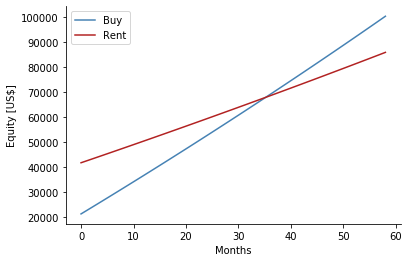

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

months = 60

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(equity[1:months], color='steelblue', label='Buy')
ax.plot(savings[1:months], color='firebrick', label='Rent')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Months')
ax.set_ylabel('Equity [US$]')
ax.legend()

plt.show()

In [6]:
purchase_price = 420000.0
down_payment = 20000.0
equity_appreciation_rate = 0.02 # 3.0% -- Assumed the same for buy and rent scenarios
initial_rent = 1600.0 # Monthly payment

monthly_buy, monthly_rent = approximate_monthly_payments(purchase_price, down_payment, initial_rent,
                                                                         equity_appreciation_rate)

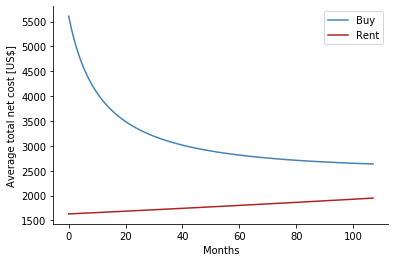

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

months = range(12,120)

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.plot(monthly_buy[months], color='steelblue', label='Buy')
ax.plot(monthly_rent[months], color='firebrick', label='Rent')
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('Months')
ax.set_ylabel('Average total net cost [US$]')
ax.legend()

plt.show()

In [8]:
purchase_price = 420000.0
down_payment = 20000.0
equity_appreciation_rate = 0.02 # 3.0% -- Assumed the same for buy and rent scenarios
initial_rent = 1600.0 # Monthly payment

payback = find_payback_time(purchase_price, down_payment, initial_rent,
                                                                         equity_appreciation_rate)

print('It takes {} months to payback the investment'.format(payback))

It takes 37 months to payback the investment
